# Loading in Data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# Installing gower
!pip3 install gower

In [ ]:
import gower

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# Agglomerative clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

In [ ]:
# path = "/content/drive/MyDrive/Data Problems Dataset/Hospital Inpatient Discharges.csv"
# df = pd.read_csv(path)
df_scaled = pd.read_csv('/content/drive/MyDrive/dataframe_processed.csv')

column_names = ['Health Service Area',
       'Age Group', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Type of Admission',
        'APR MDC Description', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description']

In [ ]:
df_scaled.shape

(2216327, 60)

In [ ]:
# Scaling down dataset (1/10)
df_scaled_down = df_scaled[:10000]

In [ ]:
df_scaled.head(3)

<ipython-input-10-54acbf7642fa>:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clustering = linkage(gower_distances, method ='average', metric = 'euclidean')


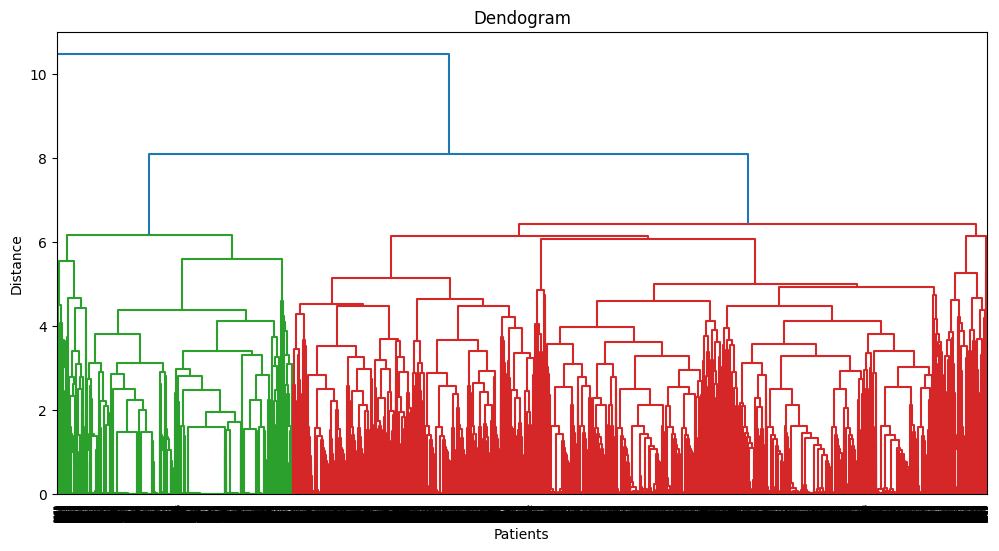

In [ ]:
from scipy.spatial.distance import euclidean
# Looking at the data via a dendogram to build intuition on how many n_clusters we can potentially use (from sample)

# Trial and Error

# (Sample = 10,000):
# Run 1: method = "average"  ; metric = "euclidean"    (silhouette_score = 0.3656) < Highest score
# Run 2: method = "complete" ; metric = "euclidean"    (silhouette_score = 0.3406)
# Run 3: method = "average"  ; metric = "cosine"       (silhouette_score = 0.3592)
# Run 4: method = "complete" ; metric = "cosine"       (silhouette_score = 0.3481)
# Run 5: method = "ward"     ; metric = "euclidean"    (silhouette_score = 0.2137)
# Run 6: method = "average"  ; metric = "manhattan"    (silhouette_score = 0.3645)
# Run 7: method = "complete" ; metric = "manhattan"    (silhouette_score = 0.2519)

gower_distances = gower.gower_matrix(df_scaled_down)
clustering = linkage(gower_distances, method ='average', metric = 'euclidean')
plt.figure(figsize=(12, 6))
dendrogram(clustering)
plt.title('Dendogram')
plt.xlabel('Patients')
plt.ylabel('Distance')
plt.savefig("dendogram.png")
plt.show()

In [ ]:
# We use "precomputed due to having already generated the Gower matrix"
hac = AgglomerativeClustering(n_clusters = 5, metric = 'precomputed', linkage = 'average')

labels = hac.fit_predict(gower_distances)

In [ ]:
labels = hac.labels_
silhouette_score(df_scaled_down, labels)

0.19455688449091832

In [ ]:
len(labels)

10000

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/dataframe.csv')
df_original = df_original[:10000]

In [ ]:
df_original["Cluster Group"] = labels
df_scaled_down["Cluster Group"] = labels

In [ ]:
df_original['Cluster Group'].value_counts(sort = True)

1    5145
4    4815
0      20
2      15
3       5
Name: Cluster Group, dtype: int64

In [ ]:
df_original.head()

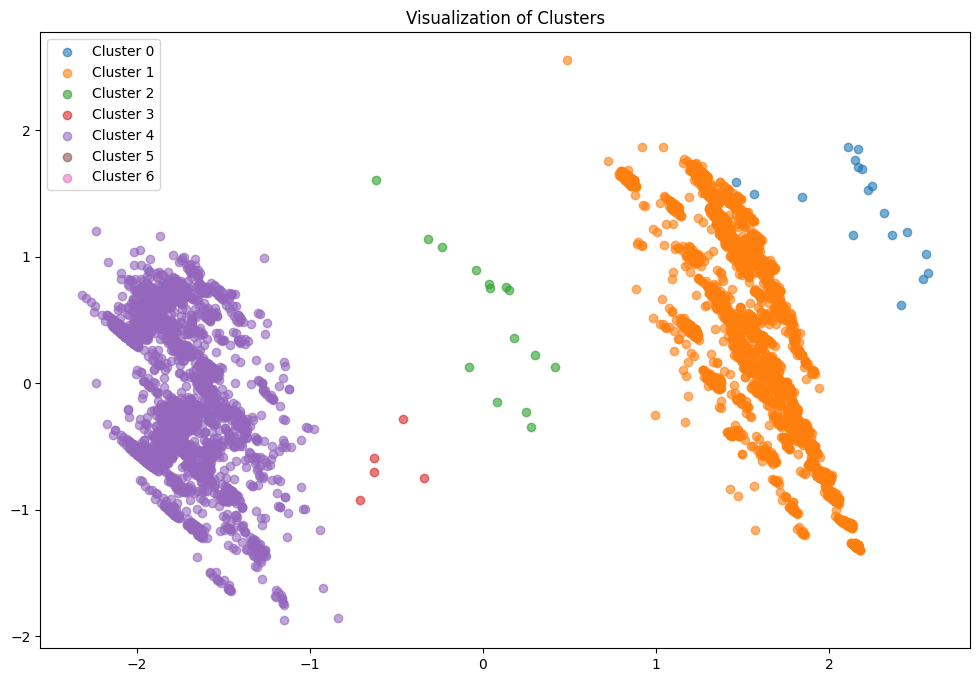

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled_down)

# Create a scatter plot with cluster colors
plt.figure(figsize=(12, 8))
for cluster in range(7):
    cluster_data = reduced_data[df_scaled_down['Cluster Group'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Visualization of Clusters')
plt.legend()
plt.savefig("clusters.png")
plt.show()